In [1]:
#Question 1
import pandas as pd
import numpy as np


In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [65]:
marketing_df = pd.read_csv('marketing.csv')
marketing_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [66]:
from sklearn.preprocessing import LabelEncoder

class_labels = LabelEncoder()

marketing_df['Education'] = class_labels.fit_transform(marketing_df['Education'].values)
marketing_df['Marital_Status'] = class_labels.fit_transform(marketing_df['Marital_Status'].values)
marketing_df['Dt_Customer'] = class_labels.fit_transform(marketing_df['Dt_Customer'].values)
inc = marketing_df["Income"].median()

marketing_df["Income"].fillna(inc, inplace = True)
#marketing_df.dropna(inplace = True)
marketing_df = marketing_df[['Year_Birth','Education','Marital_Status','Kidhome', 'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts']].dropna()
marketing_df.head()

C:\TEMP\ipykernel_39880\2225668525.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_df["Income"].fillna(inc, inplace = True)


,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts
0,1957,2,4,0,0,58,635,88,546
1,1954,2,4,1,1,38,11,1,6
2,1965,2,5,0,0,26,426,49,127
3,1984,2,5,1,0,26,11,4,20
4,1981,4,3,1,0,94,173,43,118


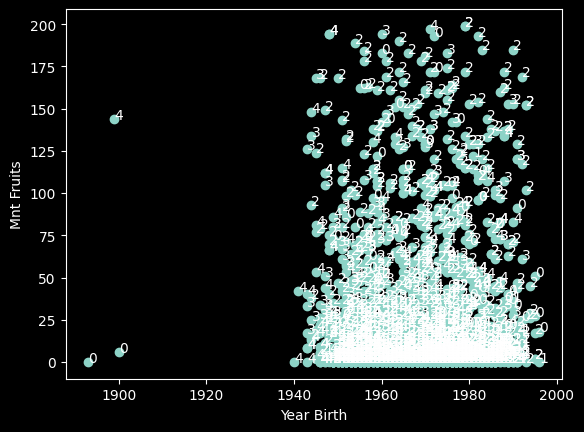

In [70]:
#Question 2
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = marketing_df.drop('Education', axis=1)
y = marketing_df['Education']

plt.scatter(X['Year_Birth'],X['MntFruits'])

for i, txt in enumerate(y):
    plt.annotate(txt, (X['Year_Birth'][i],X['MntFruits'][i]))

plt.xlabel('Year Birth')
plt.ylabel('Mnt Fruits')
plt.show()

In [71]:
inertias = []
distortions = []

for k in range(1,10):
   
    model = KMeans(n_clusters=k).fit(X)
    
    distance = cdist(X, model.cluster_centers_,
                     'euclidean')
    distortion = sum(np.min(distance, axis=1))/X.shape[0]
    distortions.append(distortion)

    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

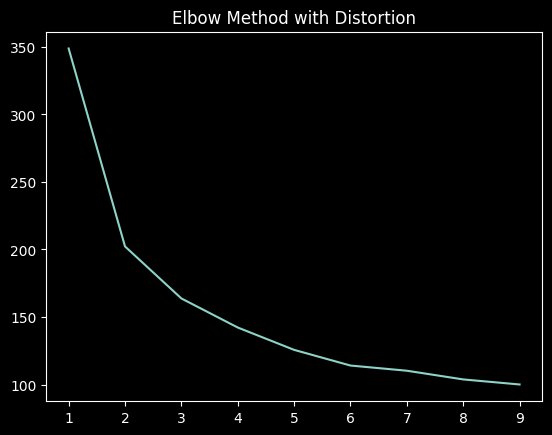

In [72]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

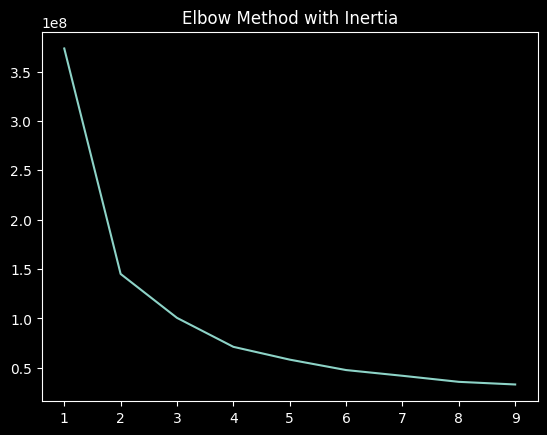

In [73]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Inertia')

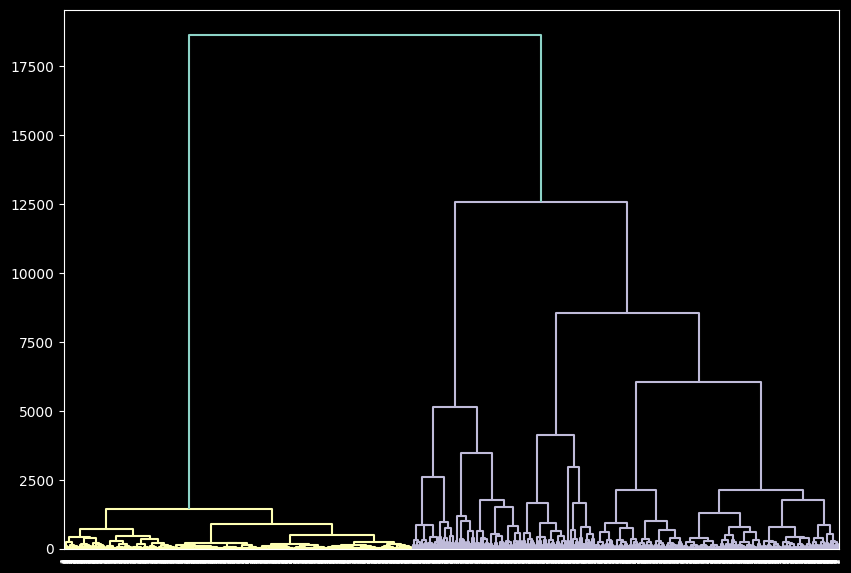

In [74]:
#QUestion 3
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(y))

In [75]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(X)

array([2, 1, 0, ..., 2, 0, 1], dtype=int64)

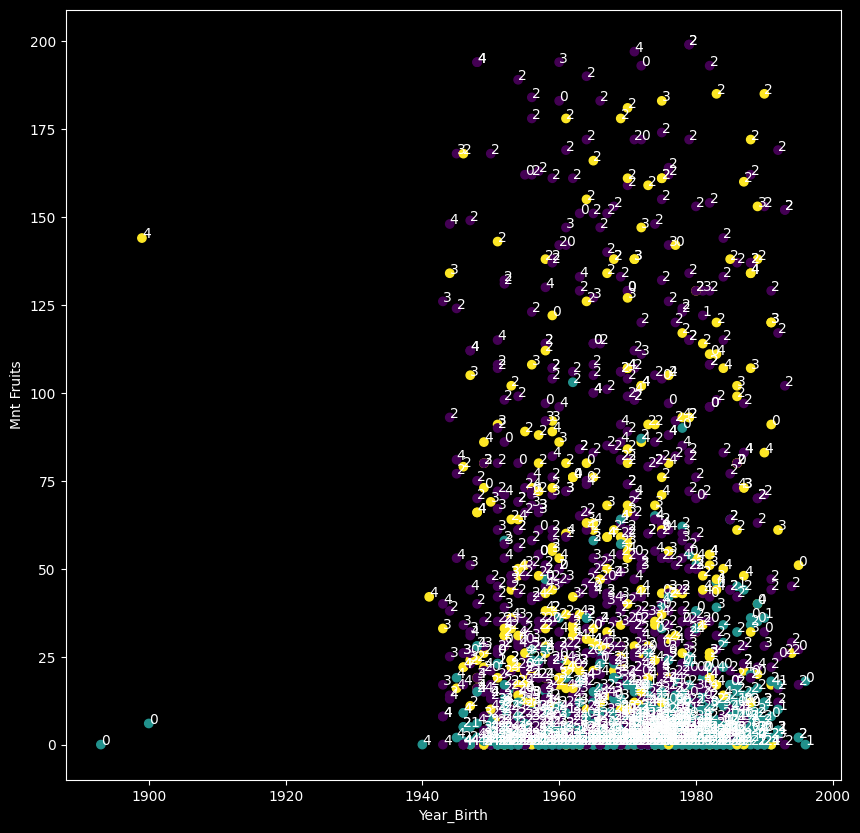

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(X['Year_Birth'],X['MntFruits'],c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Year_Birth'][i],X['MntFruits'][i]))

plt.xlabel('Year_Birth')
plt.ylabel('Mnt Fruits')
plt.show()

In [ ]:
#Question 4
